In [41]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(67)

n = 50
x0 = np.random.randn(n, 2) + np.array([-2,-2])
x1 = np.random.randn(n, 2) + np.array([2, 2])

x = np.vstack([x0, x1])
y = np.array([0]*n + [1]*n)

x_bias = np.hstack([x, np.ones((x.shape[0], 1))])

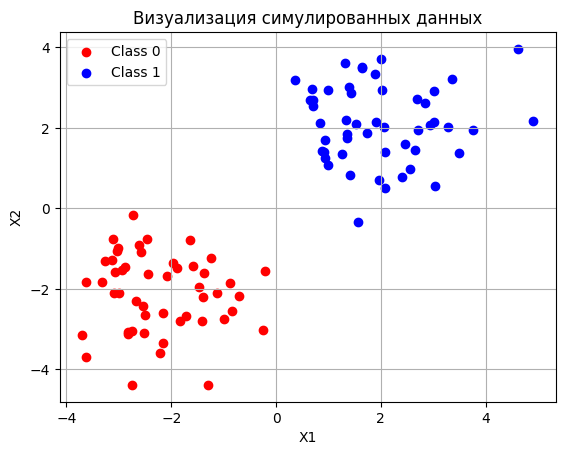

In [ ]:
plt.scatter(x0[:,0], x0[:,1], color='red', label='Class 0')   
plt.scatter(x1[:,0], x1[:,1], color='blue', label='Class 1')  

plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Визуализация симулированных данных')
plt.legend()
plt.grid(True)
plt.show()

In [43]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def predict(x, theta):
    return sigmoid(x @ theta)

def log_like(x, y, theta):
    p = predict(x, theta)
    res = np.sum(y * np.log(p) + (1 - y) * np.log(1-p))
    print(res)
    return res

In [44]:
def gradient_descent(x, y, lr=0.1, epochs = 50):
    theta = np.zeros(x.shape[1])
    theta_history = [theta.copy()]

    for _ in range(epochs):
        p = predict(x, theta)
        grad = x.T @ (p - y)  
        theta -= lr * grad
        theta_history.append(theta.copy())
    
    return theta, np.array(theta_history)

In [45]:
def natural_gradient_descent(x, y, lr=0.1, epochs=50):
    theta = np.zeros(x.shape[1])
    theta_history = [theta.copy()]
    
    for _ in range(epochs):
        p = predict(x, theta)
        grad = x.T @ (p - y)
        W = np.diag(p * (1 - p))
        F_inv = np.linalg.pinv(x.T @ W @ x)  
        theta -= lr * (F_inv @ grad)
        theta_history.append(theta.copy())
        
    return theta, np.array(theta_history)

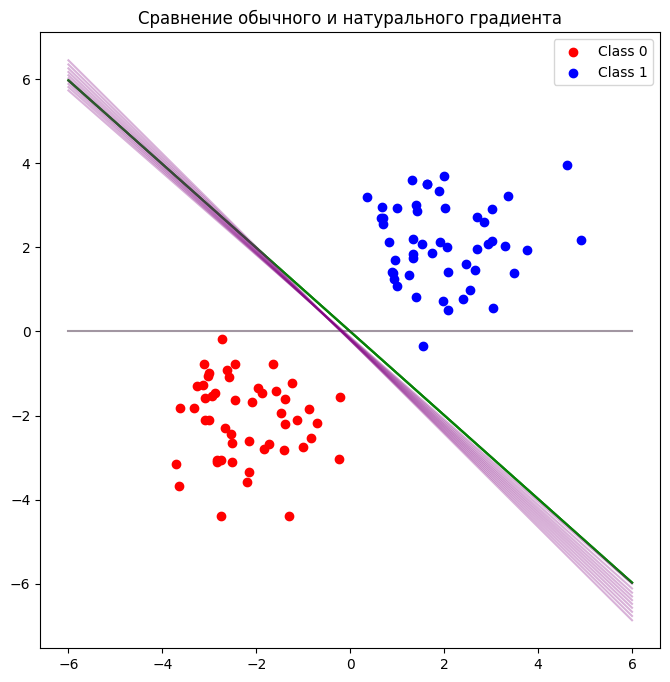

In [46]:
theta_gd, hist_gd = gradient_descent(x_bias, y)
theta_ng, hist_ng = natural_gradient_descent(x_bias, y)

epsilon = 1e-8

plt.figure(figsize=(8,8))
plt.scatter(x0[:,0], x0[:,1], color='red', label='Class 0')
plt.scatter(x1[:,0], x1[:,1], color='blue', label='Class 1')

x_line = np.linspace(-6, 6, 100)
for hist, color, label in zip([hist_gd, hist_ng], ['green', 'purple'], ['GD', 'Natural GD']):
    for theta in hist[::5]:  
        y_line = -(theta[0]*x_line + theta[2])/(theta[1] + epsilon)
        plt.plot(x_line, y_line, color=color, alpha=0.3)
plt.legend()
plt.title("Сравнение обычного и натурального градиента")
plt.show()
